<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_methane_CH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methane (CH₄)**

[Methane](https://en.m.wikipedia.org/wiki/Methane) (CH₄) has a Tetrahedral geometry with equal C-H bond lengths.

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Methane-2D-dimensions.svg/320px-Methane-2D-dimensions.svg.png)

In [ ]:
!pip install pyscf geometric -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
from pyscf import gto

# Define the molecule
mol = gto.Mole()
mol.atom = '''
    C  0.000000  0.000000  0.000000
    H  0.629118  0.629118  0.629118
    H -0.629118 -0.629118  0.629118
    H -0.629118  0.629118 -0.629118
    H  0.629118 -0.629118 -0.629118
'''

# Name
molecule = 'Methane (CH₄)'

# Set basis set
mol.basis = 'cc-pvdz' # Alternatively: sto-3g, cc-pvdz,6-31G

*Emission and Absorption Lines*

converged SCF energy = -39.7267153115431


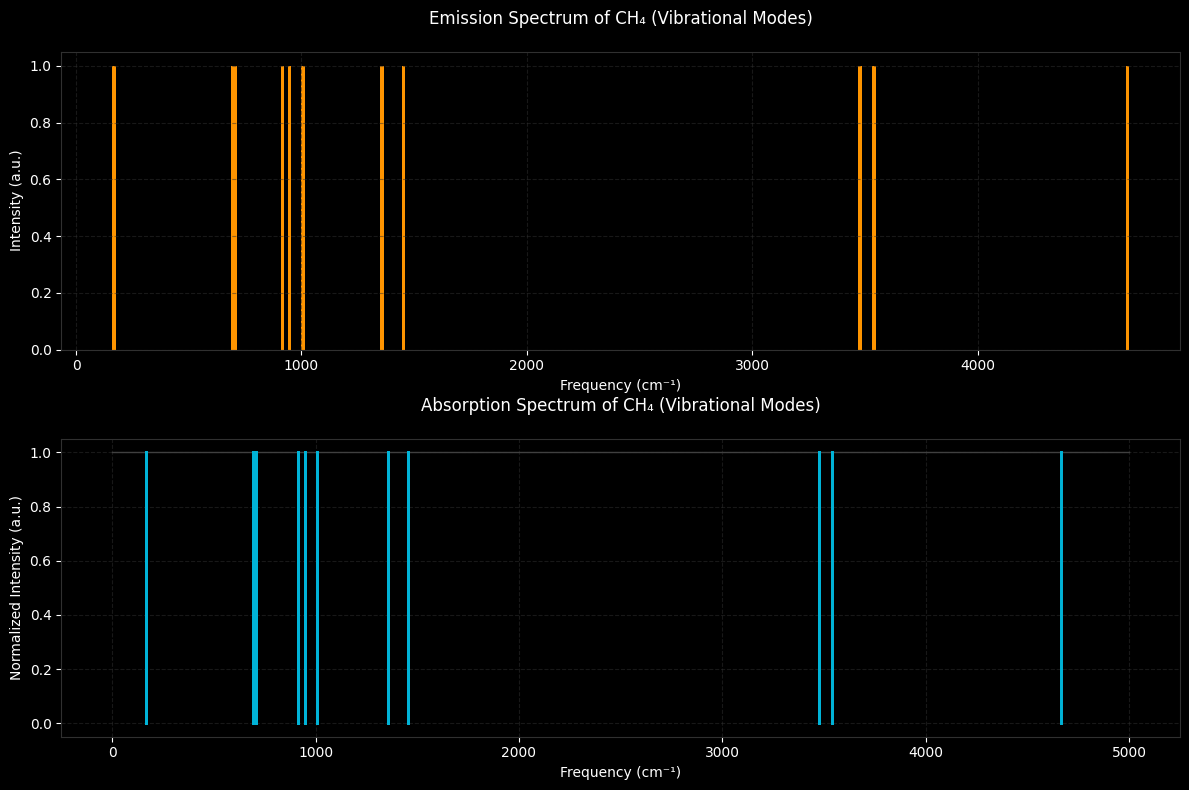

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Custom colors
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid

# Step 1: Define the molecule ad basis
mol.atom = mol.atom
mol.basis = mol.basis
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Create figure with dark background
plt.figure(figsize=(12, 8), facecolor='black')
# Set the style to dark background
plt.style.use('dark_background')

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title('Emission Spectrum of CH₄ (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title('Absorption Spectrum of CH₄ (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

*Ground State Energies*

In [ ]:
from pyscf import dft

# Define the molecule
mol.atom = mol.atom
mol.basis = mol.basis
mol.verbose = 4
mol.build()

# Perform a DFT calculation part I
mf = dft.RKS(mol)
mf.xc = 'b3lyp'

### Store convergence data
conv_data = []

### Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

### Set the callback directly on the mf object
mf.callback = callback

# Perform a DFT calculation part II
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp5fth5fan
max_memory 4000 MB (current use 258 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = b3lyp
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7b735e6457e0>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_r

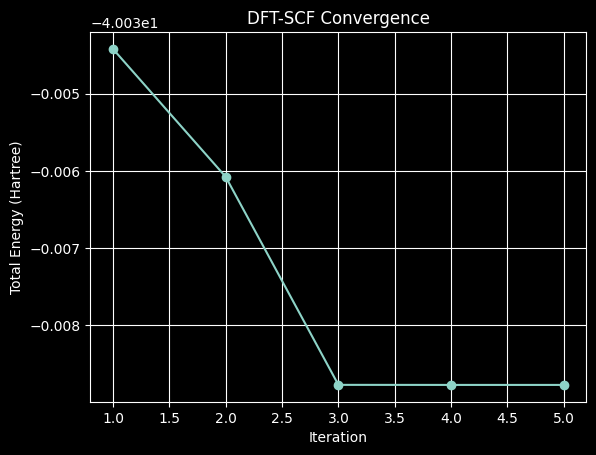

In [ ]:
# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

In [ ]:
print(f"DFT energy for {molecule} using {mf.xc}: {energy} Hartree")

DFT energy for Methane (CH₄) using b3lyp: -40.03876929064469 Hartree


*Geometry Optimization using DFT-SCF*

In [ ]:
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize

# Define the molecule with a rough guess for geometry (initial atomic positions)
# These positions don't need to be exact, as the optimization will refine them
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Perform geometry optimization using DFT
mf = dft.RKS(mol)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf) # This function iteratively adjusts positions of atoms to minimize total energy of system

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.0/385.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-9144814b-5f87-4846-9f26-6a4af075e10b.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.629118   0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118  -0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118   0.629118  -0.629118    0.000000  0.000000  0.000000
   H   0.629118  -0.629118  -0.629118    0.000000  0.000000  0.000000
converged SCF energy = -40.0387692906447
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000     0.0000000000
1 H    -0.0032791907    -0.0032791907    -0.0032791907
2 H     0.0032791907     0.0032791907    -0.0032791907
3 H     0.0032791907    -0.0032791907     0.0032791907
4 H    -0.0032791907     0.0032791907     0.0032791907
----------------------------------------------
cycle 1: E = -40.0387692906  dE = -40.0388  norm(grad) = 0.0

Step    0 : Gradient = 5.080e-03/5.680e-03 (rms/max) Energy = -40.0387692906
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.48515e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.000000   0.000000   0.000000   -0.000000  0.000000  0.000000
   H   0.634097   0.634097   0.634097    0.004979  0.004979  0.004979
   H  -0.634097  -0.634097   0.634097   -0.004979 -0.004979  0.004979
   H  -0.634097   0.634097  -0.634097   -0.004979  0.004979 -0.004979
   H   0.634097  -0.634097  -0.634097    0.004979 -0.004979 -0.004979
converged SCF energy = -40.038916029184
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000000000     0.0000000000    -0.0000000000
1 H     0.0006474854     0.0006474854     0.0006474854
2 H    -0.0006474854    -0.0006474854     0.0006474854
3 H    -0.0006474854     0.0006474854    -0.0006474854
4 H     0.0006474854    -0.0006474854    -0.0006474854
----------------------------------------------
cycle 2: E = -40.0389160292  dE = -0.000146739  norm(grad) = 

Step    1 : Displace = 7.714e-03/8.624e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 1.003e-03/1.121e-03 (rms/max) E (change) = -40.0389160292 (-1.467e-04) Quality = 0.793
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 4.17330e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000    0.000000 -0.000000  0.000000
   H   0.633276   0.633276   0.633276   -0.000821 -0.000821 -0.000821
   H  -0.633276  -0.633276   0.633276    0.000821  0.000821 -0.000821
   H  -0.633276   0.633276  -0.633276    0.000821 -0.000821  0.000821
   H   0.633276  -0.633276  -0.633276   -0.000821  0.000821  0.000821
converged SCF energy = -40.0389222071705
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000    -0.0000000000
1 H     0.0000119282     0.0000119282     0.0000119282
2 H    -0.0000119282    -0.0000119282     0.0000119282
3 H    -0.0000119282     0.0000119282    -0.0000119282
4 H     0.0000119282    -0.0000119282    -0.0000119282
----------------------------------------------
cycle 3: E = -40.0389222072  dE = -6.17799e-06  norm(grad) =

Step    2 : Displace = 1.272e-03/1.422e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.848e-05/2.066e-05 (rms/max) E (change) = -40.0389222072 (-6.178e-06) Quality = 1.025
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 4.09642e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000   -0.000000  0.000000  0.000000
   H   0.633261   0.633261   0.633261   -0.000015 -0.000015 -0.000015
   H  -0.633261  -0.633261   0.633261    0.000015  0.000015 -0.000015
   H  -0.633261   0.633261  -0.633261    0.000015 -0.000015  0.000015
   H   0.633261  -0.633261  -0.633261   -0.000015  0.000015  0.000015
converged SCF energy = -40.0389222098258
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.0000000000
1 H     0.0000002115     0.0000002115     0.0000002115
2 H    -0.0000002115    -0.0000002115     0.0000002115
3 H    -0.0000002115     0.0000002115    -0.0000002115
4 H     0.0000002115    -0.0000002115    -0.0000002115
----------------------------------------------
cycle 4: E = -40.0389222098  dE = -2.65533e-09  norm(grad) =

Step    3 : Displace = 2.387e-05/2.669e-05 (rms/max) Trust = 2.000e-01 (+) Grad = 3.277e-07/3.664e-07 (rms/max) E (change) = -40.0389222098 (-2.655e-09) Quality = 1.274
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 4.09642e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 4.253 seconds


Optimized Geometry (in Angstroms):
[[ 2.06214481e-14  3.37710394e-14  1.11609881e-13]
 [ 1.19668915e+00  1.19668915e+00  1.19668915e+00]
 [-1.19668915e+00 -1.19668915e+00  1.19668915e+00]
 [-1.19668915e+00  1.19668915e+00 -1.19668915e+00]
 [ 1.19668915e+00 -1.19668915e+00 -1.19668915e+00]]
